# Bank Marketing - Subscription Prediction

### Marketing
The action or business of promoting and selling products or services, including market research and advertising.

### Term deposit
Term Deposits are one of the best investment options for people who are looking for a stable and safe return on their investments. In Term Deposits, the sum of money is kept for a fixed maturity and the depositor is not allowed to withdraw this sum till the end of the maturity period. That is why they are called as Term Deposits because they are kept up to a particular term.

## Data Set information

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The dataset bank-additional-full.csv contains all examples (45211) with 17 features, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
### Attribute information
#### Input Variables
##### Bank Client Data
**age:** (numeric)  
**job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
**marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
**education:** (categorical: primary, secondary, tertiary and unknown)  
**default:** has credit in default? (categorical: 'no','yes')  
**balance:** average yearly balance, in euros (numeric)   
**housing:** has housing loan? (categorical: 'no','yes')  
**loan:** has personal loan? (categorical: 'no','yes')  
##### Related with the last contact of the current campaign:
**contact:** contact communication type (categorical: 'cellular','telephone')  
**day:** last contact day of the month (numeric)  
**month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
**duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
##### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)  
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)  
**previous:** number of contacts performed before this campaign and for this client (numeric)  
**poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

#### Output variable (desired target):
**y:** has the client subscribed a term deposit? (binary: 'yes','no')

**Note:** It is mentioned in the Data Set information that thee are no missing values, but still we will run some test forr the same.

## Data Exploration
### import pandas and numpy for Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 

df = pd.read_csv('./bank/bank-full.csv')
print('Total samples: ', len(df))

Total samples:  45211


### Missing Data

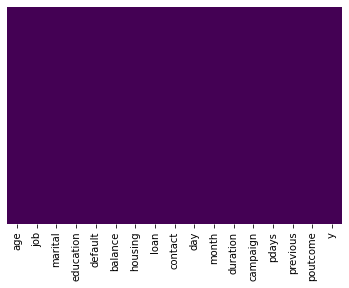

In [2]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values.

### Overview of available data

In [4]:
df.describe()
# df[df['pdays'] != -1].count()
# df[df['previous'] != 0].count()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Quick Observations on Numerical Data
- Total available data count is 45211 entries  
- Mean Age of the contacted customers is 41 years (Approx)  
- Mininmum Age of the contacted customers is 18 years
- Maximum Age of the contacted customers is 95 years
- Mean of call durationss is 258 seconds  
- Mean account balance for the customers 1362 euros  
- More than 75% of the the values in the column 'pdays' are set to -1. We know from our attribute informations that -1 means client was not previously contacted
- Just similar to the last observation more than 75% of the values inside the columns 'previous' which indicates how many times the customer was contacted before this campaign is 0 i. e. the customer is being contactedd forr the very first time.
- The values '-1' and '0' of the columns 'pdays' and 'previous' respectively are actually pointing towards the same fact.
- Because of the significant redundency of '0' and '-1' in their respective columns We might drop them later if their fluctuations do not show any relation with the outcome i. e. column 'y'.

In [5]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


#### Quick Observation on Categorical Data
- Out of 45211, more than 44000 i. e. 97.3% customers do not have a credit. The number of customers with credit are negligible when compared to it. We might drop this column later.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
df.shape

(45211, 17)

In [9]:
df.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

**Quick Observation** 
- 5289 Out of 45211 contacted customers subscribed

In [10]:
# Adding a new column by name 'subscribed' to store the value '1' if subscribed, else '0' 
df['subscribed'] = (df.y == 'yes').astype('int')
df.drop('y', axis=1, inplace=True)

In [11]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [12]:
# By calculating the prevalance we are checking that out of total customers how many customer have actually suscribed 
def calculate_prevalance(subscribed):
    total_customers = len(df)
    positive_prevalance = sum(subscribed)/total_customers
    positive_prevalance = round(positive_prevalance, 3)
    print(f"The positive prevalnce is: {positive_prevalance}")
    
calculate_prevalance(df['subscribed'].values)

The positive prevalnce is: 0.117


### Exploring unique values
- Checking if there are any unnecessary columns
- Finding categorical varieties

In [13]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,balance,housing,loan,contact,day
0,58,management,married,tertiary,no,2143,yes,no,unknown,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5


In [14]:
df[list(df.columns)[10:]].head()

,month,duration,campaign,pdays,previous,poutcome,subscribed
0,may,261,1,-1,0,unknown,0
1,may,151,1,-1,0,unknown,0
2,may,76,1,-1,0,unknown,0
3,may,92,1,-1,0,unknown,0
4,may,198,1,-1,0,unknown,0


In [15]:
df.shape

(45211, 17)

In [16]:
# check unique values for every column
for feature in df.columns:
    
    # get a list of unique values
    unique_values = df[feature].unique()
    print(f'{feature} : {len(unique_values)} unique values')

age : 77 unique values
job : 12 unique values
marital : 3 unique values
education : 4 unique values
default : 2 unique values
balance : 7168 unique values
housing : 2 unique values
loan : 2 unique values
contact : 3 unique values
day : 31 unique values
month : 12 unique values
duration : 1573 unique values
campaign : 48 unique values
pdays : 559 unique values
previous : 41 unique values
poutcome : 4 unique values
subscribed : 2 unique values


In [17]:
# for every column
check_value_occerrence = []
for feature in df.columns:
    
    # get a list of unique values
    unique_values = df[feature].unique()
    number_of_unique_values = len(unique_values)
    if number_of_unique_values < 30:
        print(f'{feature} : {number_of_unique_values}\n{unique_values}')
        check_value_occerrence.append(feature)

job : 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : 3
['married' 'single' 'divorced']
education : 4
['tertiary' 'secondary' 'unknown' 'primary']
default : 2
['no' 'yes']
housing : 2
['yes' 'no']
loan : 2
['no' 'yes']
contact : 3
['unknown' 'cellular' 'telephone']
month : 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : 4
['unknown' 'failure' 'other' 'success']
subscribed : 2
[0 1]


### Numerical Features

In [18]:
numerical_data = [data for data in df.dtypes[df.dtypes == 'int64'].index]
numerical_data

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [19]:
df[numerical_data].isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [20]:
df[numerical_data].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


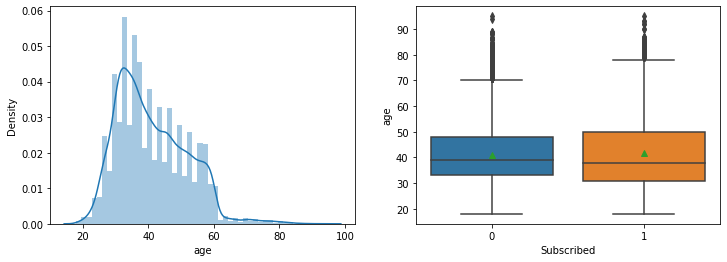

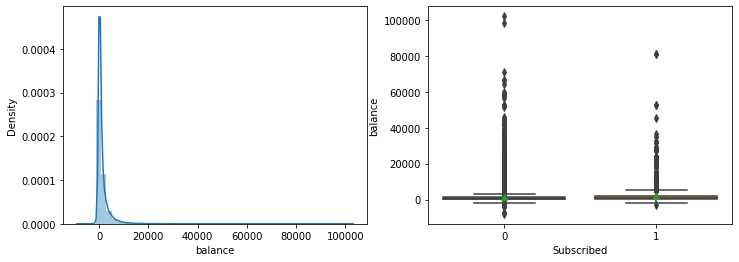

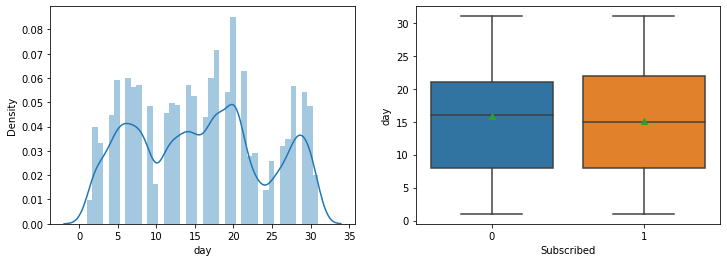

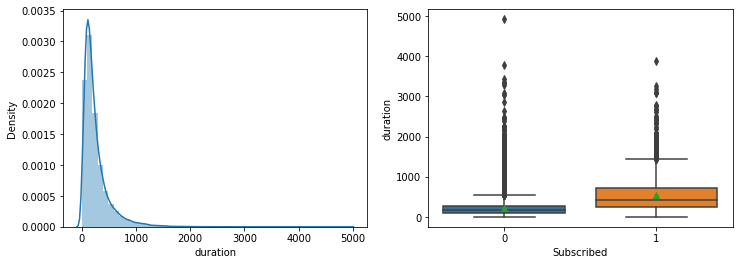

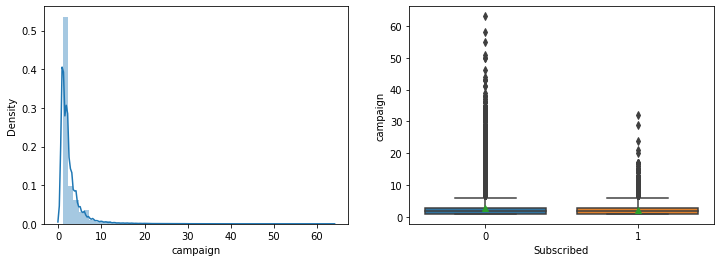

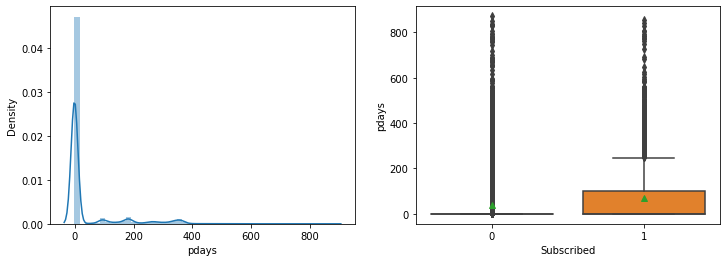

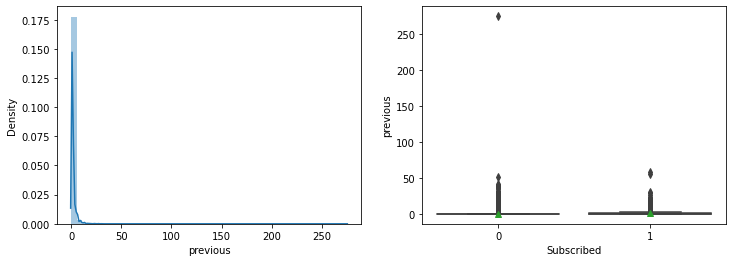

In [21]:
#creating distribution and box plots
for col in numerical_data : 
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='subscribed', y = col, data =df, showmeans = True)
    plt.xlabel('Subscribed')
    plt.ylabel(col)
    
    plt.show()

**Observation:** 
- From the Density and boxplot shown above we can say that the customerrs with longer call durations are more likely to subscribe for the term deposit
- Most of the customers who actually subscribed were contacted for the very first time
- Except for the column of age and days, all the other numerical features seems to be left skewed.

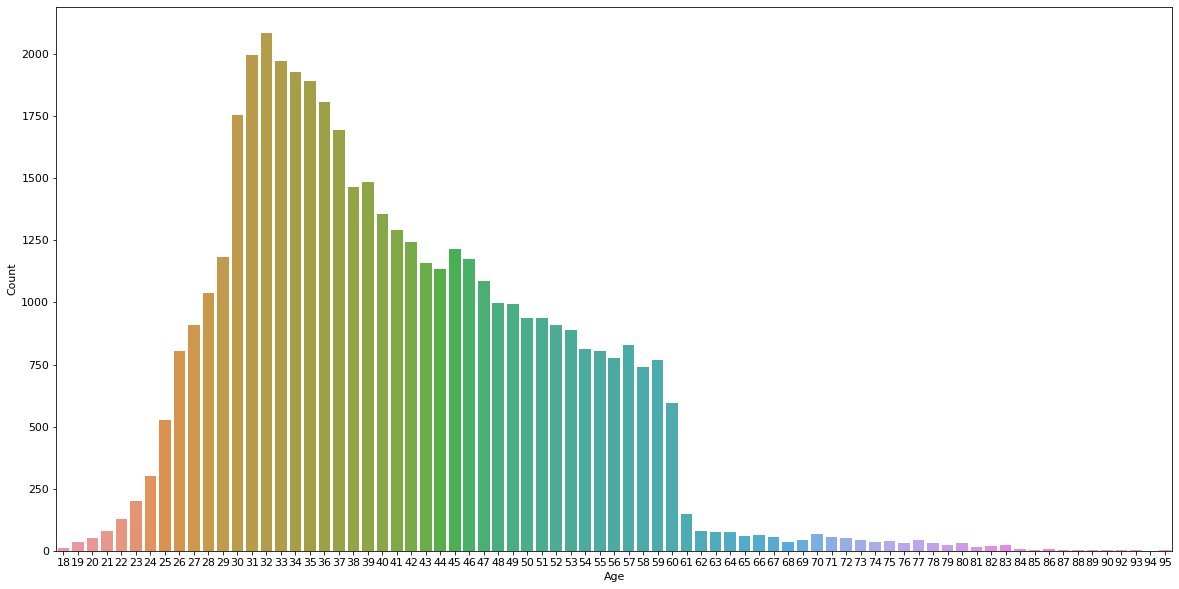

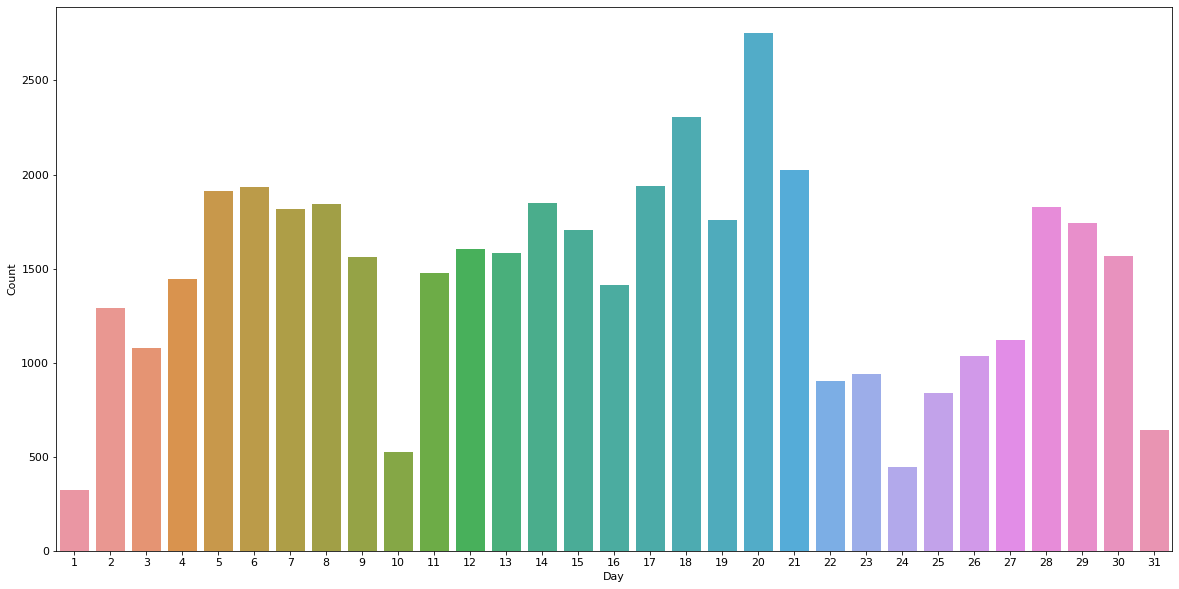

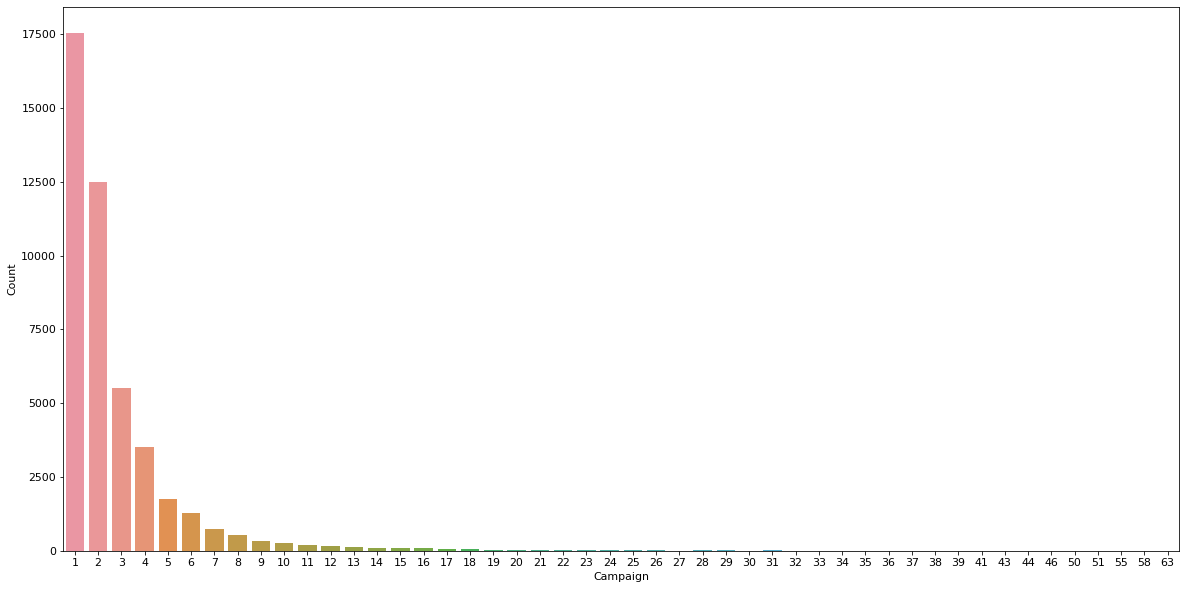

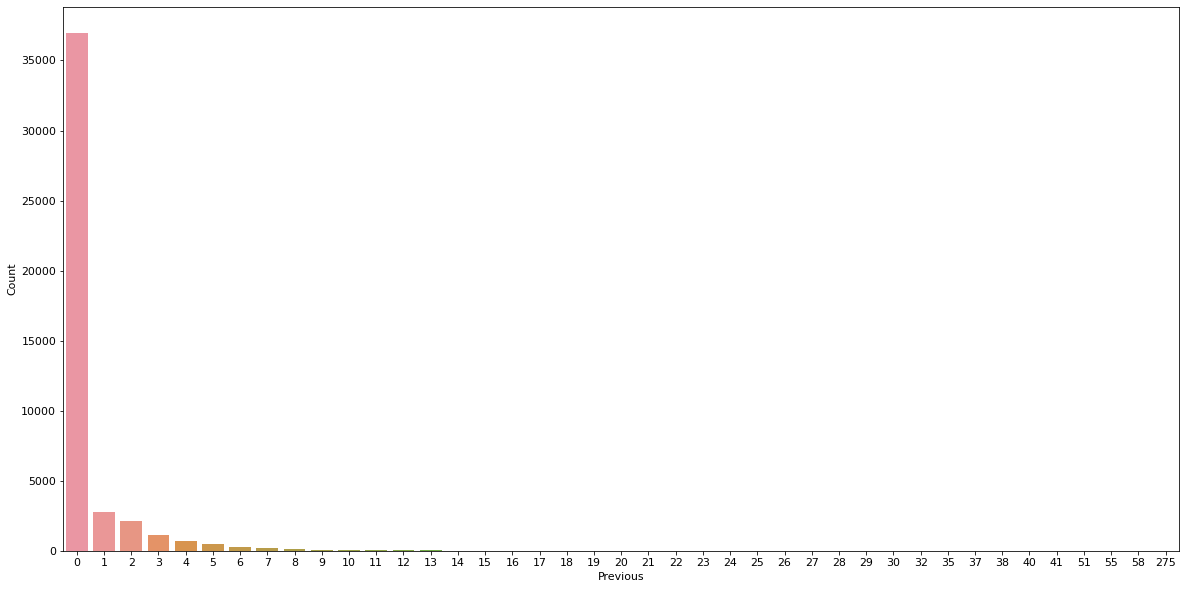

In [22]:
plt.rcParams.update({'font.size': 11})
for col in numerical_data : 
    if col not in ['balance', 'duration', 'pdays']:
        plt.figure(figsize=(20,10))
        plt.subplot().patch.set_visible(False)
        sns.countplot(x = df[col], data = df)
        plt.xlabel(col.title())
        plt.ylabel('Count')

        plt.show()

Balance, duration, pdays can be stored in bins

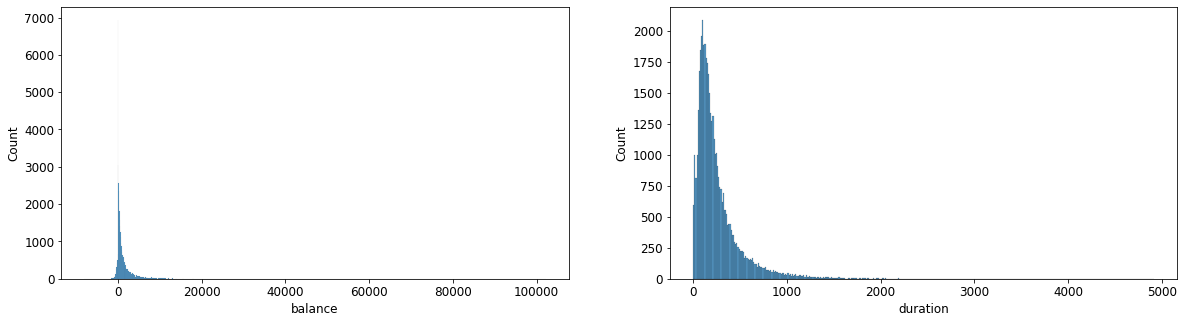

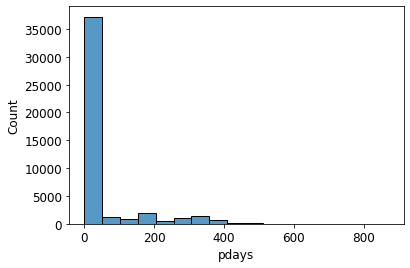

In [23]:
plt.subplots(figsize=(20,5)) 
plt.rcParams.update({'font.size': 12})
    
plt.subplot(1, 2, 1)
sns.histplot(x = df['balance'], data = df)
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(x = df['duration'], data = df)
plt.ylabel('Count')
plt.show()

plt.subplot()
sns.histplot(x = df['pdays'], data = df)
plt.ylabel('Count')

plt.show()

**Observations**
- The maximum targeted age group is 30 to 37 Years old with more than 2000 people of age 32
- More than 2500 people were contacted on 20th day of the month
- more than 17500 customers were contacted only once during the campaign

## Categorical Features

Categorical variables are non-numeric data such as job and education. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

In [24]:
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

### Graphical Representation of Categorical Features

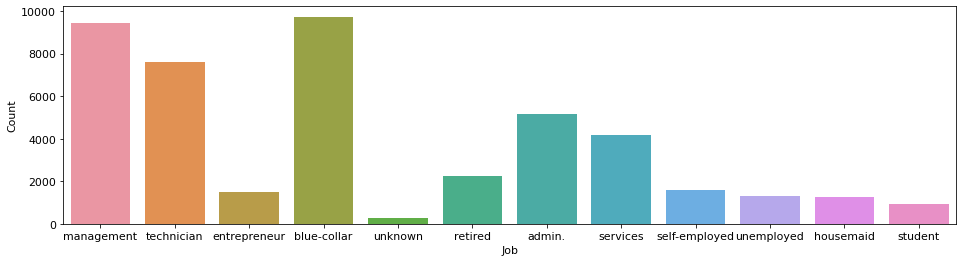

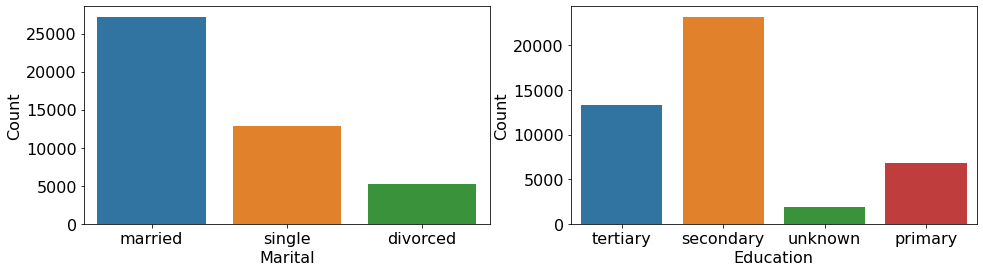

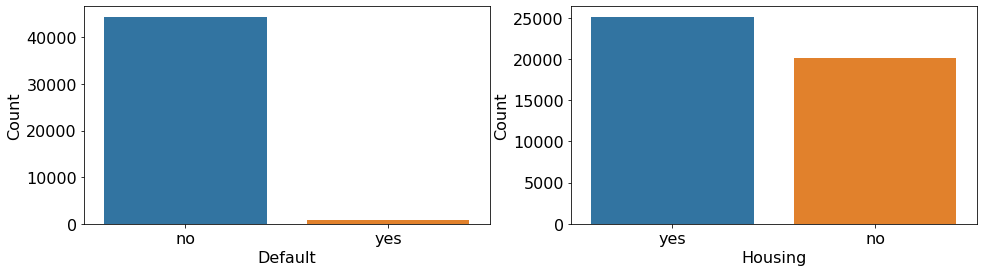

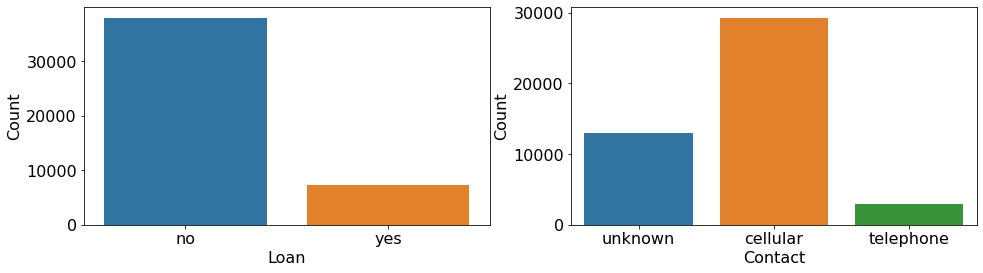

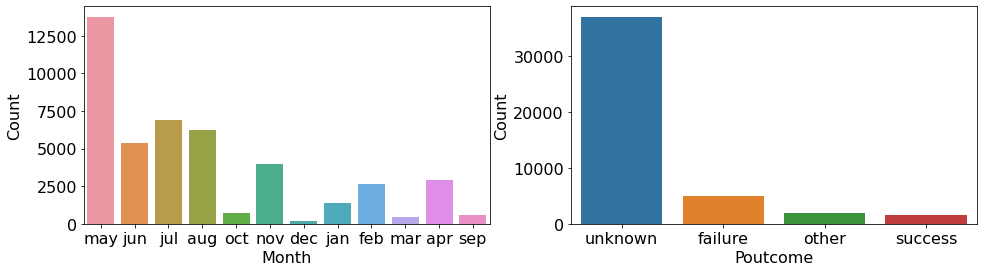

In [25]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(16,4))
plt.subplot().patch.set_visible(False)
sns.countplot(x = df['job'], data = df)
plt.xlabel('Job')
plt.ylabel('Count')

plt.rcParams.update({'font.size': 16})

for col in range(1, len(object_data) - 1, 2): 
    plt.figure(figsize=(16,4))
    col_index = col
    column_name = object_data[col_index]
    col_index += 1
    plt.subplot(1, 2, 1).patch.set_visible(False)
    sns.countplot(x = df[column_name], data = df)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
                 
    plt.subplot(1, 2, 2)
    column_name = object_data[col_index]
    sns.countplot(x = df[column_name], data = df)
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
    
    plt.show()

**Observations**
- We can see the most of the targeted customers are either in management or are blue-coller (9000+ each)
- More than 25000 of the customers are married
- 20000+ customers have received secondary education
- 40000+ customers do not have any credit
- Around 25000+ have taken a housing loan
- 35000+ People do not have any kind of personal loan
- Around 30000+ people were contacted over cellular phones
- Most of the customers were contacted in the month of May
- Most of the people are being contacted for the very first time hence most of the values in the column poutcomee are unknown
- 5289 Out of 45211 contacted customers subscribed

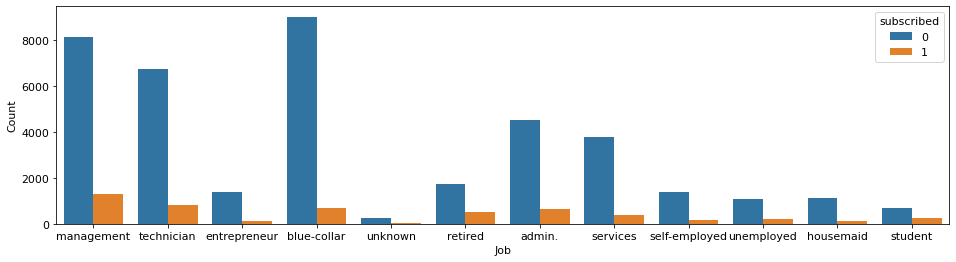

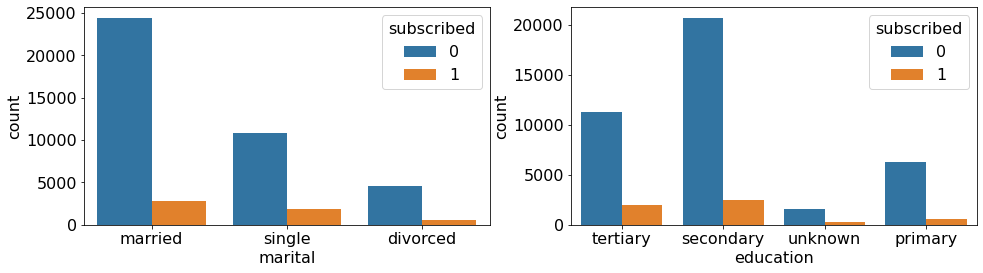

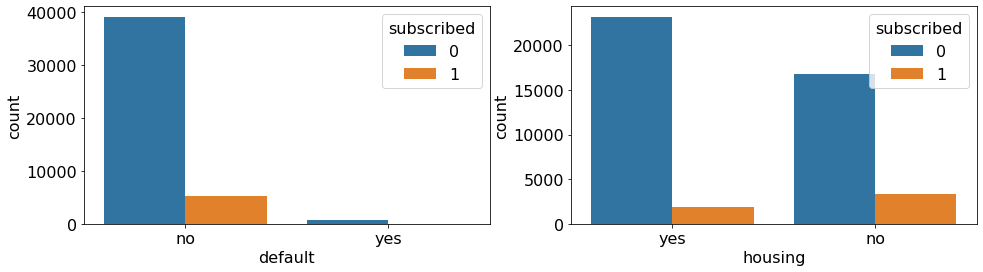

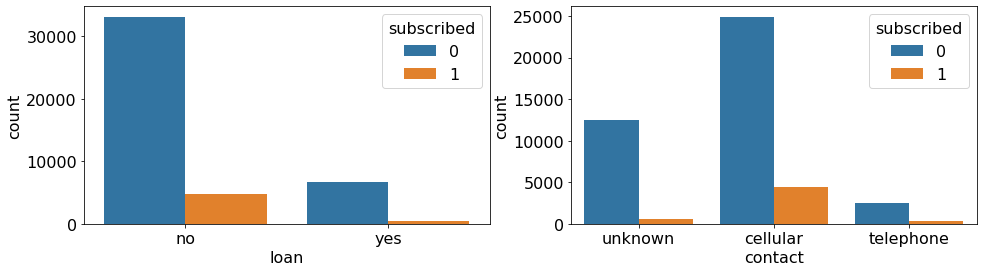

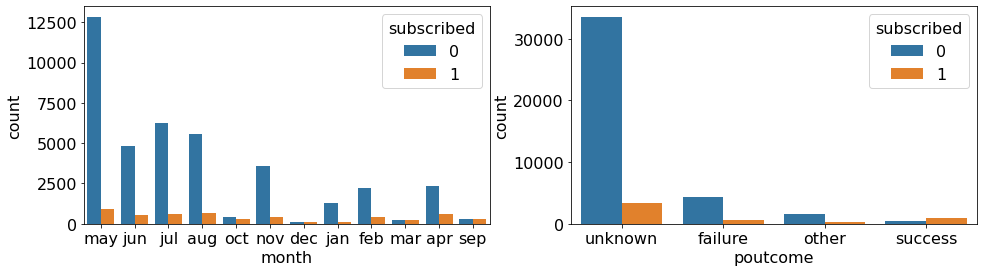

In [26]:
plt.rcParams.update({'font.size': 11})

plt.figure(figsize=(16,4))
plt.subplot().patch.set_visible(False)
sns.countplot(x = df['job'], hue='subscribed', data = df)
plt.xlabel('Job')
plt.ylabel('Count')

plt.rcParams.update({'font.size': 16})

plt.show()

for col in range(1, len(object_data) - 1, 2): 
    plt.figure(figsize=(16,4))
    col_index = col
    column_name = object_data[col_index]
    col_index += 1
    plt.subplot(1, 2, 1).patch.set_visible(False)
    sns.countplot(x=df[column_name],hue='subscribed',data=df)
    
    column_name = object_data[col_index]
    plt.subplot(1, 2, 2).patch.set_visible(False)
    sns.countplot(x=df[column_name],hue='subscribed',data=df)
    
    plt.show()

In [27]:
for col in object_data:
    print(df.groupby(['subscribed', col]).size())

subscribed  job          
0           admin.           4540
            blue-collar      9024
            entrepreneur     1364
            housemaid        1131
            management       8157
            retired          1748
            self-employed    1392
            services         3785
            student           669
            technician       6757
            unemployed       1101
            unknown           254
1           admin.            631
            blue-collar       708
            entrepreneur      123
            housemaid         109
            management       1301
            retired           516
            self-employed     187
            services          369
            student           269
            technician        840
            unemployed        202
            unknown            34
dtype: int64
subscribed  marital 
0           divorced     4585
            married     24459
            single      10878
1           divorced      622
    

**Obeservations**
- The customerrs in job category 'retired' have shown higher interest in the term deposit as compared to the others.
- Customers with a tertiary level of education were more like to subscribe for the term deposit.
- The people who do not have a credit have shown interest in the term deposit.
- The people who do not have a housing loan have shown relatively higher interest in the term deposit.
- Customers who were contacted during the month of March, September, December, and October repectively have mostly subscribed to the term deposit.

In [28]:
df['education'].replace('unknown',0, inplace=True)
df['education'].replace('primary',1, inplace=True)
df['education'].replace('secondary',2, inplace=True)
df['education'].replace('tertiary',3, inplace=True)

In [29]:
df['education'].dtypes

dtype('int64')

In [30]:
df.corr()

,age,education,balance,day,duration,campaign,pdays,previous,subscribed
age,1.000000,-0.173615,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
education,-0.173615,1.000000,0.050572,0.021661,0.002554,0.000194,0.007092,0.025295,0.051341
balance,0.097783,0.050572,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.021661,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.002554,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.000194,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.007092,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.025295,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
subscribed,0.025155,0.051341,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


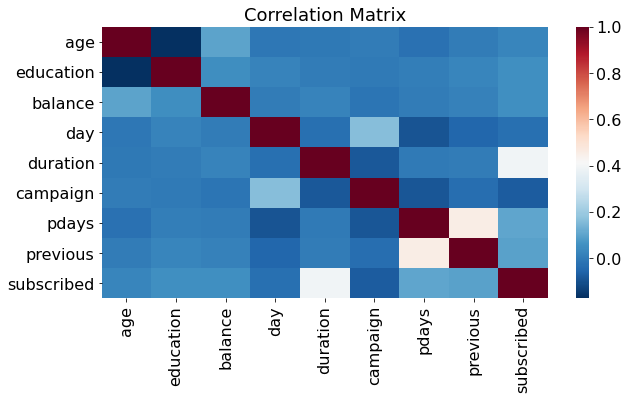

In [31]:
plt.subplots(figsize=(10,5)) 
sns.heatmap(df.corr(), cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=18)
plt.show()

In [32]:
# frequency of particular value in a columns where 
for column in check_value_occerrence:
    print(f'{df.groupby(column).size()}\n')

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

marital
divorced     5207
married     27214
single      12790
dtype: int64

education
0     1857
1     6851
2    23202
3    13301
dtype: int64

default
no     44396
yes      815
dtype: int64

housing
no     20081
yes    25130
dtype: int64

loan
no     37967
yes     7244
dtype: int64

contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
dtype: int64

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64

subscribed
0    39922
1     5289
dtype: int64



## Feature Engineering

Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data.Here, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical and categorical features.

In [33]:
df.dtypes

age            int64
job           object
marital       object
education      int64
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed     int32
dtype: object

In [34]:
# Check for missing values
df[object_data].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
dtype: int64

In [35]:
encoded_df = df.copy()

In [36]:
for col in object_data:
    encoded_df[col] = df[col].astype('category')
    encoded_df[col+"_encoded"] = encoded_df[col].cat.codes
encoded_df.dtypes

age                     int64
job                  category
marital              category
education            category
default              category
balance                 int64
housing              category
loan                 category
contact              category
day                     int64
month                category
duration                int64
campaign                int64
pdays                   int64
previous                int64
poutcome             category
subscribed              int32
job_encoded              int8
marital_encoded          int8
education_encoded        int8
default_encoded          int8
housing_encoded          int8
loan_encoded             int8
contact_encoded          int8
month_encoded            int8
poutcome_encoded         int8
dtype: object

In [37]:
encoded_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,subscribed,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,poutcome_encoded
0,58,management,married,3,no,2143,yes,no,unknown,5,...,0,4,1,3,0,1,0,2,8,3
1,44,technician,single,2,no,29,yes,no,unknown,5,...,0,9,2,2,0,1,0,2,8,3
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,...,0,2,1,2,0,1,1,2,8,3
3,47,blue-collar,married,0,no,1506,yes,no,unknown,5,...,0,1,1,0,0,1,0,2,8,3
4,33,unknown,single,0,no,1,no,no,unknown,5,...,0,11,2,0,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,...,1,9,1,3,0,0,0,0,9,3
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,...,1,5,0,1,0,0,0,0,9,3
45208,72,retired,married,2,no,5715,no,no,cellular,17,...,1,5,1,2,0,0,0,0,9,2
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,...,0,1,1,2,0,0,0,1,9,3


In [38]:
encoded_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed', 'job_encoded', 'marital_encoded',
       'education_encoded', 'default_encoded', 'housing_encoded',
       'loan_encoded', 'contact_encoded', 'month_encoded', 'poutcome_encoded'],
      dtype='object')

In [39]:
encoded_df.drop(object_data, axis=1, inplace=True)
encoded_df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'subscribed', 'job_encoded', 'marital_encoded', 'education_encoded',
       'default_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded',
       'month_encoded', 'poutcome_encoded'],
      dtype='object')

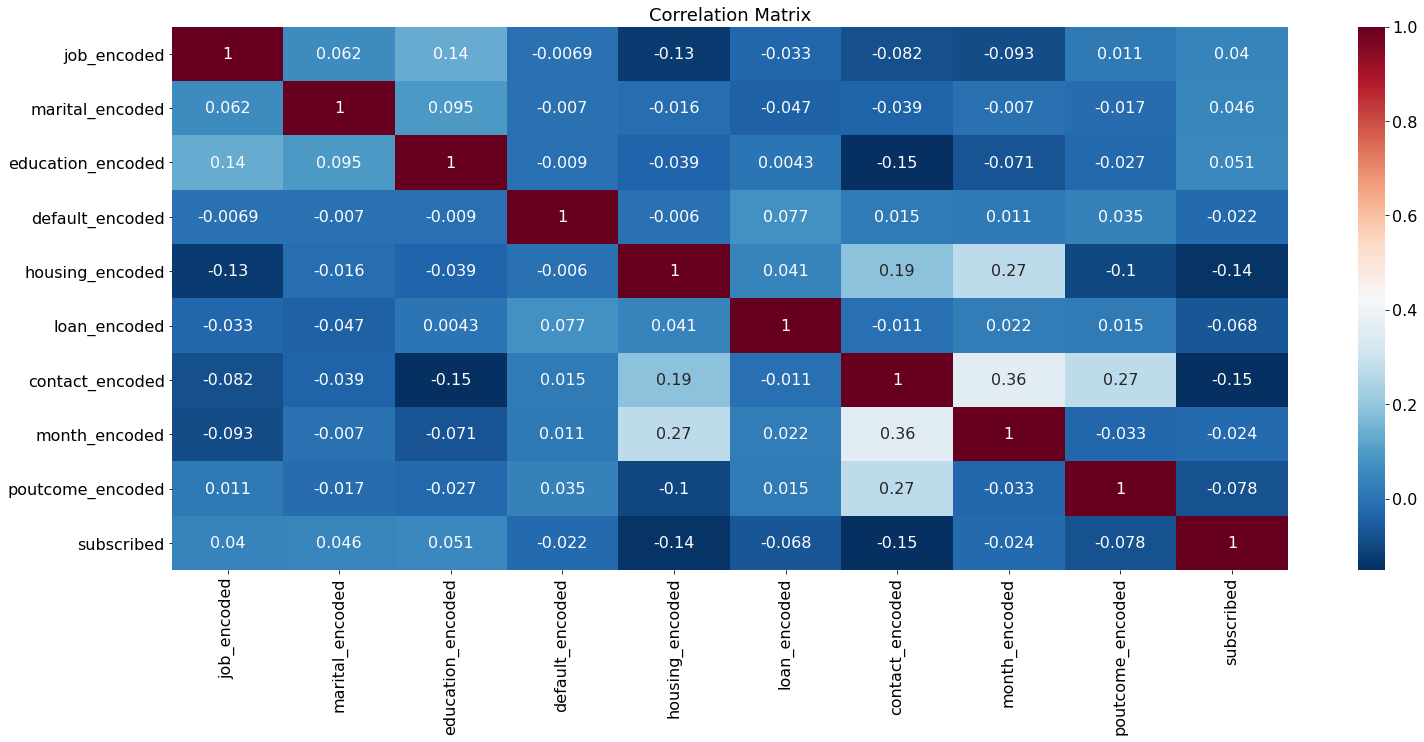

In [40]:
plt.subplots(figsize=(25,10)) 
sns.heatmap(encoded_df[['job_encoded', 'marital_encoded', 'education_encoded',
       'default_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded',
       'month_encoded', 'poutcome_encoded', 'subscribed']].corr(), cbar=True, cmap="RdBu_r", annot=True)
plt.title("Correlation Matrix", fontsize=18)
plt.show()

In [41]:
#defaut feature does not play imp role
print(encoded_df.groupby(['default_encoded']).size())
print(encoded_df.groupby(['subscribed','default_encoded']).size())

default_encoded
0    44396
1      815
dtype: int64
subscribed  default_encoded
0           0                  39159
            1                    763
1           0                   5237
            1                     52
dtype: int64


In [42]:
print('10 most frequent values in the column "previous":')
print(encoded_df.groupby(['previous']).size()[:10])
print()
print("Data in previous column compared to the 'y':")
print(encoded_df.groupby(['subscribed','previous']).size())

10 most frequent values in the column "previous":
previous
0    36954
1     2772
2     2106
3     1142
4      714
5      459
6      277
7      205
8      129
9       92
dtype: int64

Data in previous column compared to the 'y':
subscribed  previous
0           0           33570
            1            2189
            2            1650
            3             848
            4             543
                        ...  
1           26              1
            29              1
            30              1
            55              1
            58              1
Length: 66, dtype: int64


In [43]:
print(encoded_df.groupby(['pdays']).size())
print(encoded_df.groupby(['subscribed','pdays']).size())

pdays
-1      36954
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Length: 559, dtype: int64
subscribed  pdays
0           -1       33570
             1           9
             2          35
             3           1
             4           1
                     ...  
1            804         1
             805         1
             828         1
             842         1
             854         1
Length: 914, dtype: int64


In [44]:
encoded_df.shape

(45211, 17)

### Dropping non-related columns
- **default:** It has 44369 'no' values. It denotes that 44369 out of 45211 customers do not have a credit in default.
- **contact:** This column can't contribute anymore in our prediction as the standard meddium of communication is 'cellular' now.
- **month and day:** We can drop these two columns as they aren't showing any significant correlation with our target variable.
- **pdays and previous:** Most frequent values in these two columns are -1, and 0. both these values have a frequency of 36954 and are pointing towards the same  fact. We can drop both of them as they aren't showing any significant correlation with our target variable.
- **poutcome:** We will drop this column as it has 36959 'unknown' values, also it isn't showing any significant correlation with the target.

In [45]:
df.drop(['default', 'contact', 'month', 'day', 'pdays', 'previous', 'poutcome'], axis=1, inplace= True)

In [46]:
df.shape

(45211, 10)

In [47]:
df[(df['job']=='unknown') & (df['education']=='unknown')].count()

age           0
job           0
marital       0
education     0
balance       0
housing       0
loan          0
duration      0
campaign      0
subscribed    0
dtype: int64

### Dropping rows with unknown values
- We are dropping the rows with 'unknown' as entry from the education and job column. Column 'education' has 1857, and 'job' has 288 unknown values.
- A total of 127 rows have 'unknown' entry in both the education and job column.
- Dropping these entries will removes a total of 2018 values from our dataframe.

In [48]:
df.drop(df[df['job']=='unknown'].index, inplace=True)
# in the education column we have asssigned the value 0 to 'unknown'
df.drop(df[df['education']==0].index, inplace=True)

In [49]:
df.shape

(43193, 10)

In [50]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'subscribed'],
      dtype='object')

In [51]:
object_data = [data for data in df.dtypes[df.dtypes == 'object'].index]
object_data

['job', 'marital', 'housing', 'loan']

In [52]:
#with one hot encoding
df_ohe = df.copy()
obj_data_ohe = pd.get_dummies(df_ohe[object_data],drop_first = False)
obj_data_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1


In [61]:
obj_data_ohe.keys()

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes'],
      dtype='object')

In [60]:
obj_data_ohe.shape

(43193, 18)

In [55]:
df_ohe = pd.concat([df_ohe, obj_data_ohe], axis=1)
df_ohe.drop('subscribed', axis=1, inplace=True)
df_ohe['subscribed'] = df['subscribed']

In [56]:
df_ohe.keys()

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'subscribed'],
      dtype='object')

In [57]:
# Dropping object data from dataframe df_ohe, as we are going to use the encoded columns
df_ohe.drop(object_data, axis=1, inplace=True)

In [58]:
df_ohe.keys()

Index(['age', 'education', 'balance', 'duration', 'campaign', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'subscribed'],
      dtype='object')

In [59]:
df_ohe.shape

(43193, 24)

### Summary of Feature engneering

In [64]:
print('Total number of features:', len(df_ohe.keys()))
print('Numerical Features:',len(df_ohe.keys()) - len(obj_data_ohe.keys()))
print('Encoded Categorical Features:', len(obj_data_ohe.keys()))

Total number of features: 24
Numerical Features: 6
Encoded Categorical Features: 18


In [65]:
# Checking for any null values
df_ohe.isnull().sum().sort_values(ascending = False)

age                  0
education            0
loan_yes             0
loan_no              0
housing_yes          0
housing_no           0
marital_single       0
marital_married      0
marital_divorced     0
job_unemployed       0
job_technician       0
job_student          0
job_services         0
job_self-employed    0
job_retired          0
job_management       0
job_housemaid        0
job_entrepreneur     0
job_blue-collar      0
job_admin.           0
campaign             0
duration             0
balance              0
subscribed           0
dtype: int64

In [77]:
# Copying data to a new dataframe, which includes the columns of interest.
df_model = df_ohe.copy()

print("Columns of our interest:")

for col in df_model:
    print(f'\t\t\t{col}')

Columns of our interest:
			age
			education
			balance
			duration
			campaign
			job_admin.
			job_blue-collar
			job_entrepreneur
			job_housemaid
			job_management
			job_retired
			job_self-employed
			job_services
			job_student
			job_technician
			job_unemployed
			marital_divorced
			marital_married
			marital_single
			housing_no
			housing_yes
			loan_no
			loan_yes
			subscribed


In [84]:
df_model[list(df_model.columns)[:12]].head()

,age,education,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed
0,58,3,2143,261,1,0,0,0,0,1,0,0
1,44,2,29,151,1,0,0,0,0,0,0,0
2,33,2,2,76,1,0,0,1,0,0,0,0
5,35,3,231,139,1,0,0,0,0,1,0,0
6,28,3,447,217,1,0,0,0,0,1,0,0


In [85]:
df_model[list(df_model.columns)[12:]].head()

,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,subscribed
0,0,0,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,0,0,1,0,1,1,0,0
2,0,0,0,0,0,1,0,0,1,0,1,0
5,0,0,0,0,0,1,0,0,1,1,0,0
6,0,0,0,0,0,0,1,0,1,0,1,0
